#### Competition Description
Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies). You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.



In [1]:
#Importing Necessary Libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

stopwords = stopwords.words('english') + ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would','http','amp','im','new','u']

In [2]:
df =pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

## Explatory Data Analysis (EDA)

### Data Exploration
###### Examining the dataset to understand its structure, size, and the types of variables it contains.

In [3]:
df.shape, df_train.shape

((3263, 4), (7613, 5))

We have 3263 rows and 4 columns data in the test csv file.

We have 7613 rows and 5 columns data in the train csv file.

In [4]:
df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
df_train.isnull().sum().to_frame()
#missing 2533 locattion values, and 61 keyword.

,0
id,0
keyword,61
location,2533
text,0
target,0


In [7]:
df=df_train.append(df) #We merged the test and train data

In [8]:
df.shape

(10876, 5)

In [9]:
df.drop(columns=['location','keyword'], inplace=True)

### Data visualization
###### Creating visual representations of the data to help identify patterns, trends, and outliers.

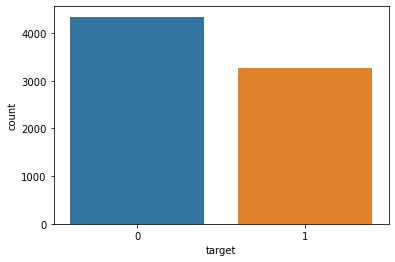

In [10]:
df_train['target'].value_counts()
sns.countplot(df_train['target'],data=df_train);
#We saw that the number of disaster tweets and non-disaster tweets

The code you provided lists out 7 common steps in natural language processing (NLP) projects:
    
    1-Removing punctuation
    2-Converting to lowercase or uppercase
    3-Removing newline characters
    4-Removing digits
    5-Tokenization
    6-Stemming or Lemmatization
    7-Removing stopwords

In [11]:
df

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,Forest fire near La Ronge Sask. Canada,1.0
2,5,All residents asked to 'shelter in place' are ...,1.0
3,6,"13,000 people receive #wildfires evacuation or...",1.0
4,7,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,Storm in RI worse than last hurricane. My city...,NaN
3260,10868,Green Line derailment in Chicago http://t.co/U...,NaN
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN


In [12]:
def clean_df(df):
    df['text'] = df['text'].str.lower()
    df['text'] = df['text'].str.replace('[^\w\s]','')
    df['text'] = df['text'].str.replace('\d+','')
    df['text']= df['text'].str.replace('\n','').replace('\r',' ')

In [13]:
clean_df(df)

In [14]:
#Importing the libraries for wordcloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

##### What is a wordcloud?

A word cloud (also known as a tag cloud) is a graphical representation of the most frequently used words in a given text or group of texts. The size of each word in the cloud is proportional to its frequency of occurrence. Word clouds are often used to quickly and easily identify the most important themes or topics in a piece of text. They can be created using various software tools and are commonly used in data visualization, text analysis, and digital humanities.

In [15]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

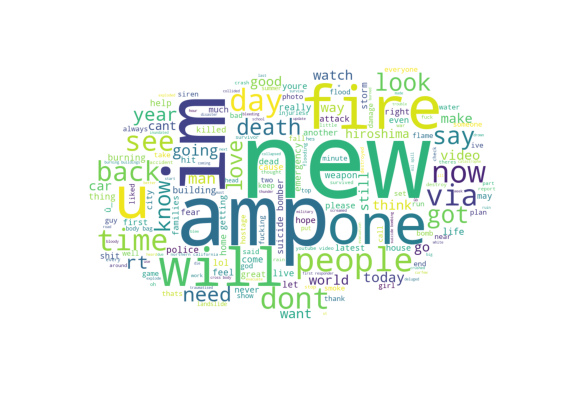

In [16]:
wc(df.text,'white') 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

### Data Modelling

In [18]:
train=df.iloc[:7613]
test=df.iloc[7613:]

In [19]:
train.head()

,id,text,target
0,1,our deeds are the reason of this earthquake ma...,1.0
1,4,forest fire near la ronge sask canada,1.0
2,5,all residents asked to shelter in place are be...,1.0
3,6,people receive wildfires evacuation orders in...,1.0
4,7,just got sent this photo from ruby alaska as s...,1.0


In [20]:
train.shape,test.shape

((7613, 3), (3263, 3))

In [21]:
x = train.text
y = train.target

In [22]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
7608    1.0
7609    1.0
7610    1.0
7611    1.0
7612    1.0
Name: target, Length: 7613, dtype: float64

In [23]:
x.shape,y.shape

((7613,), (7613,))

In [24]:
vect=CountVectorizer(stop_words="english")

In [25]:
x=vect.fit_transform(x)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)

In [27]:
x_test.shape

(1523, 21706)

In [28]:
mb=MultinomialNB()

In [29]:
tahmin=mb.fit(x_train,y_train).predict(x_test)

In [30]:
accuracy_score(tahmin,y_test)

0.7839789888378201

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
d=DecisionTreeClassifier()

In [33]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
tahmin2=d.predict(x_test)

In [35]:
accuracy_score(tahmin2,y_test)

0.7485226526592252

In [ ]:
sonuc.to_csv('submission_real.csv', index=False)